In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG

In [2]:
import numpy as np
import matplotlib.pyplot as plt

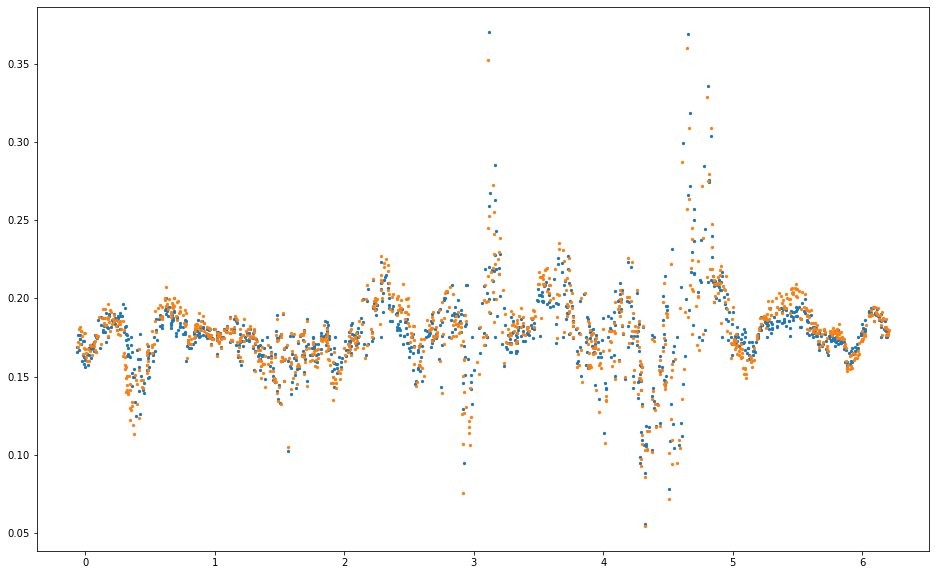

In [11]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

from classes.basic_optical_gating import AdaptedV as BOGV

og = BOG()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()

og_bc = BOGV()
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.get_bias_correction()
og_bc.run()

plt.figure(figsize = (16,10))
plt.scatter(og_bc.phases[1::], og_bc.delta_phases, s = 5)
plt.scatter(og.phases[1::], og.delta_phases, s = 5)
plt.show()

In [4]:
"""sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOG()
og.logger.set_normal()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run()
"""

og = BOG()
og.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og.set_reference_sequence("D:/Data/both 800fps/ref_seq.tif")
og.set_reference_period(3.062623721828068710e+02)
og.run()

og_lf = BOG()
og_lf.set_sequence("D:/Data/both 800fps/brightfield/*tif")
og_lf.set_reference_sequence("D:/Data/both 800fps/ref_seq.tif")
og_lf.set_reference_period(3.062623721828068710e+02)
og_lf.reduce_reference_framerate(8)
og_lf.run()


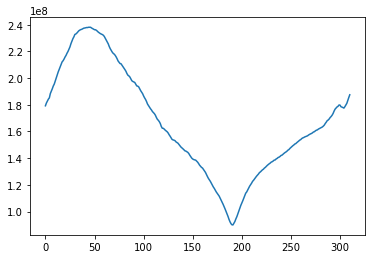

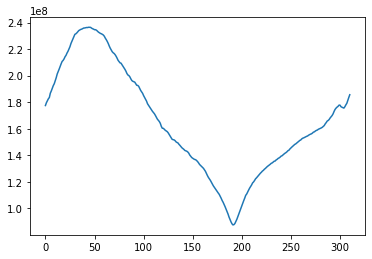

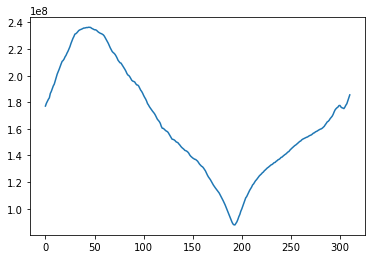

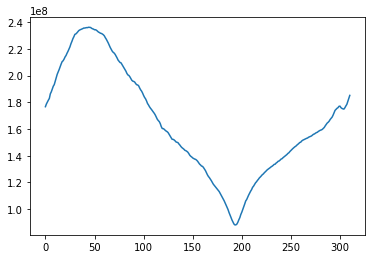

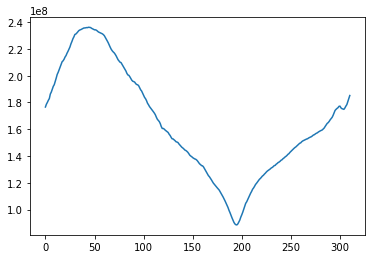

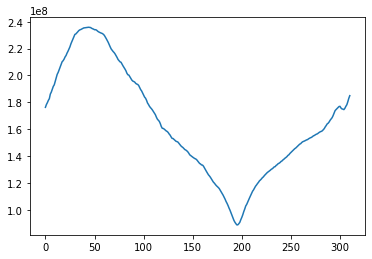

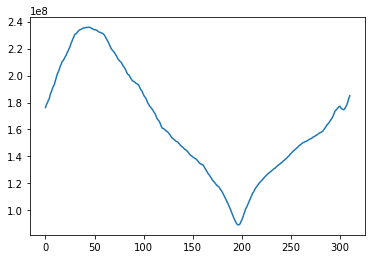

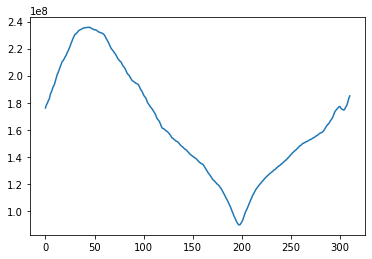

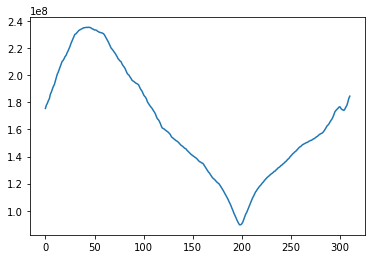

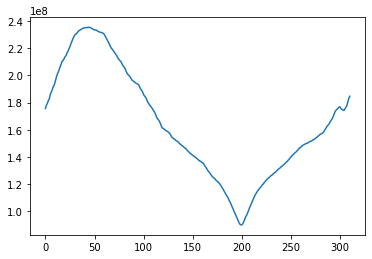

In [5]:
for i in range(10):
    plt.plot(og.sads[i])
    plt.show()

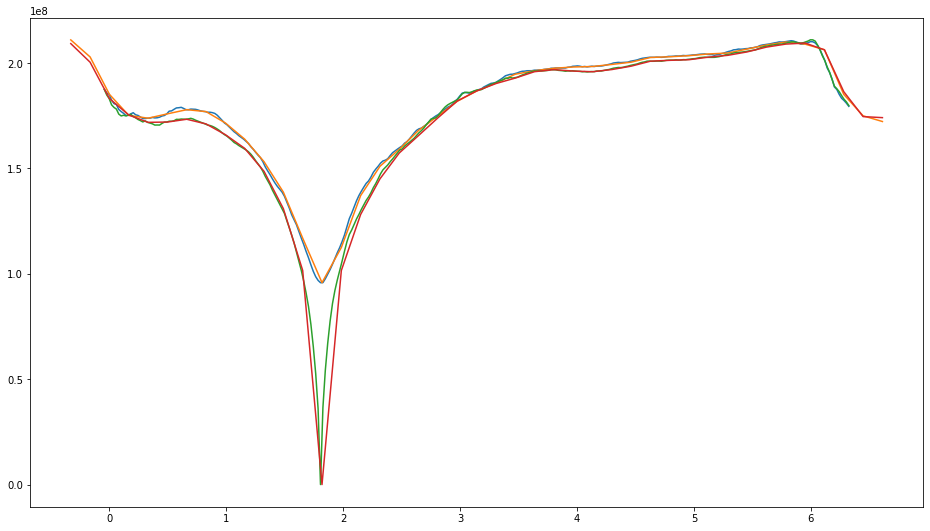

In [6]:
min = - (2 * (2 * np.pi) / og.reference_period)
max = 2 * np.pi - min
xs = np.linspace(min, max, og.reference_sequence.shape[0])
min = - (2 * (2 * np.pi) / og_lf.reference_period)
max = 2 * np.pi - min
xs_lf = np.linspace(min, max, og_lf.reference_sequence.shape[0])

plt.figure(figsize = (16,9))
plt.plot(xs,og.sads[509])
plt.plot(xs_lf,og_lf.sads[509])
plt.plot(xs,og.sads[202])
plt.plot(xs_lf,og_lf.sads[202])
plt.show()

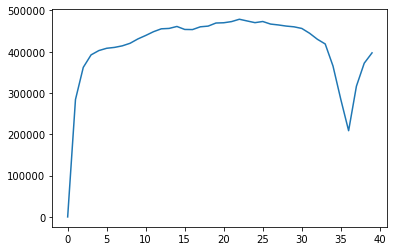

In [20]:
# First generate our reference sequence SADs
ref_sads = []
for i in range(og.reference_sequence.shape[0]):
    ref_sad = []
    for j in range(og.reference_sequence.shape[0]):
        ref_sad.append(np.sum(np.abs(og.reference_sequence[i].astype(np.int32) - og.reference_sequence[j].astype(np.int32))))
    ref_sads.append(ref_sad)

ref_sads = np.array(ref_sads)

plt.plot(ref_sads[0])

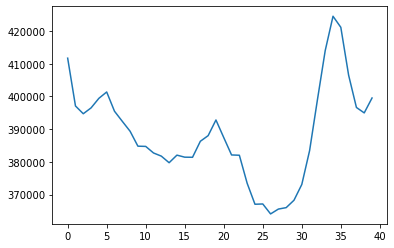

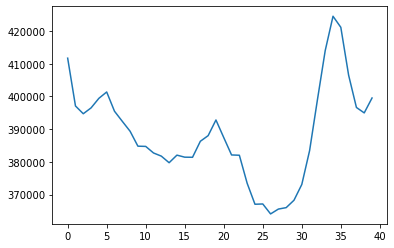

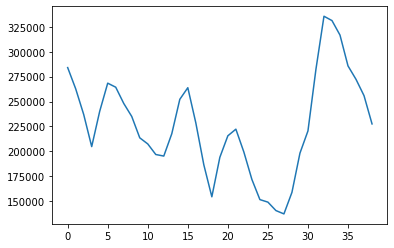

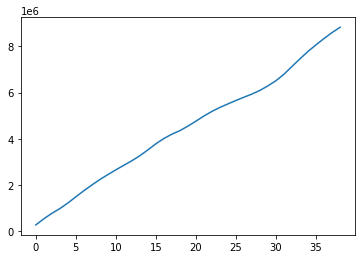

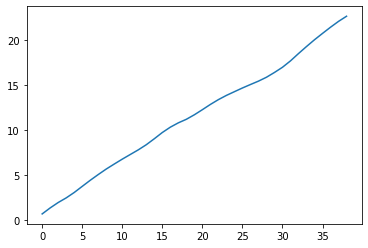

In [24]:
plt.plot(np.mean(ref_sads, axis = 1))
plt.show()

plt.plot(np.mean(ref_sads, axis = 0))
plt.show()


diffs = []
for i in range(1,og.reference_sequence.shape[0]):
    diff = np.sum(np.abs(og.reference_sequence[i].astype(np.int64) - og.reference_sequence[i - 1].astype(np.int64)))
    diffs.append(diff)

plt.plot(diffs)
plt.show()

diffs = np.array(diffs)
plt.plot(np.cumsum(diffs))
plt.show()

plt.plot(np.cumsum(1/(np.mean(ref_sads, axis = 0)[1::] / diffs)))

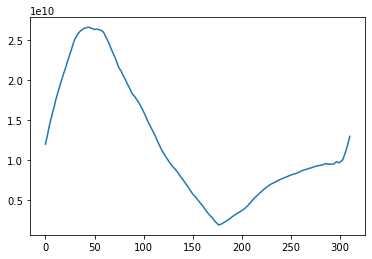

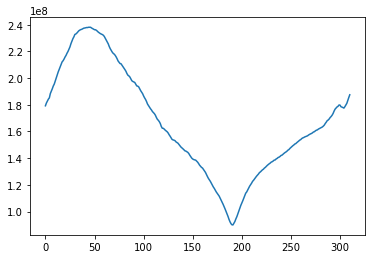

177
191


In [9]:
# Next we get the SAD between the reference SADs and our sequence SADs
subsads = []
for i in range(og.sads.shape[0]):
    subsad = []
    for j in range(ref_sads.shape[0]):
        subsad.append(np.sum(np.abs(og.sads[i] - ref_sads[j])))
    subsads.append(subsad)

subsads = np.array(subsads)

plt.plot(subsads[0])
plt.show()
plt.plot(og.sads[0])
plt.show()

print(np.argmin(subsads[0]))
print(np.argmin(og.sads[0]))

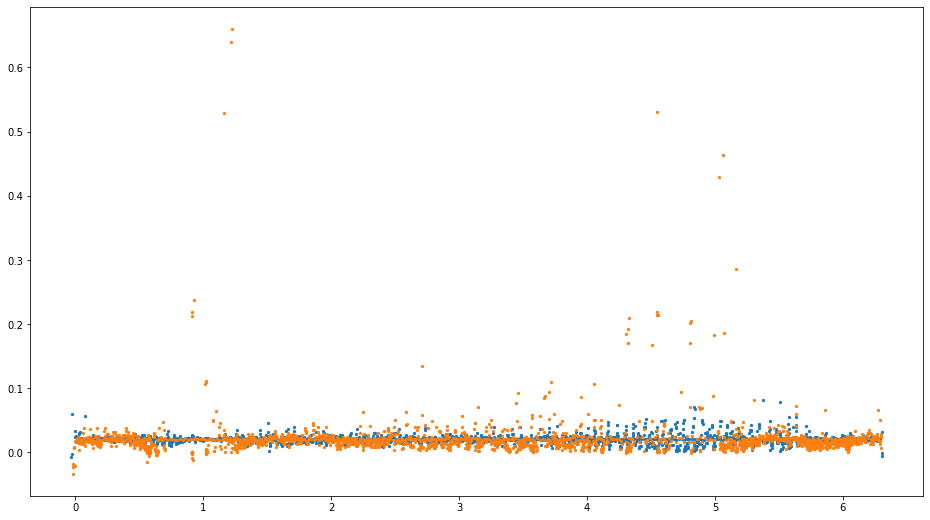

In [10]:
plt.figure(figsize = (16,9))
plt.scatter(og.phases[1::], og.delta_phases, s = 5)
og.sads = subsads
og.get_phases()
og.get_delta_phases()
plt.scatter(og.phases[1::], og.delta_phases, s = 5)
